<a href="https://colab.research.google.com/github/aws3ma/deep-learning/blob/main/Atelier_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ml_folder='/content/drive/MyDrive/'

In [ ]:
from tensorflow import keras
from keras import optimizers
from tensorflow.keras.models import Sequential ,load_model
from tensorflow.keras.layers import Dense ,Dropout ,BatchNormalization,Activation
from tensorflow.keras.utils import to_categorical

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [ ]:
df=pd.read_csv(ml_folder+'Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df=df.iloc[:,3:]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
import seaborn as sns

In [ ]:
c=df.corr(method="pearson")
c

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [ ]:
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
x = df.iloc[:,:-1]
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [ ]:
y = df.iloc[:,-1:]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,667,34,5,0.00,2,1,0,163830.64,0,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,1,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,0,0,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,1,1
356,850,57,8,126776.30,2,1,1,132298.49,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,1,0,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_train.iloc[:,:-3])
x_train.iloc[:,:-3]=sc.transform(x_train.iloc[:,:-3])
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
7389,0.169582,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432,0,1,0
9275,-2.304559,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664,1,0,1
2995,-1.191196,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335,0,0,0
5316,0.035566,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528,0,1,1
356,2.056114,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9225,-0.582970,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330,1,0,0
4859,1.478815,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760,0,1,0
3264,0.901515,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320,0,0,1
9845,-0.624205,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321,0,1,0


In [ ]:
x_test.iloc[:,:-3]=sc.transform(x_test.iloc[:,:-3])
x_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9394,-0.552043,-0.368904,1.044737,0.879303,-0.921591,0.642595,0.968738,1.610857,1,0,0
898,-1.314903,0.109617,-1.031415,0.429722,-0.921591,0.642595,-1.032270,0.495870,0,0,0
2398,0.571630,0.301026,1.044737,0.308583,-0.921591,0.642595,0.968738,-0.424787,0,1,0
5906,1.416961,-0.656016,-0.339364,0.575336,-0.921591,-1.556190,-1.032270,-0.187777,0,0,1
2343,0.571630,-0.081791,0.006661,1.389611,0.809503,0.642595,0.968738,0.616842,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1037,-0.263393,-1.421650,-1.377440,-1.215717,0.809503,0.642595,0.968738,1.404319,0,0,0
2899,-0.665441,-0.368904,0.698712,-1.215717,0.809503,0.642595,-1.032270,-0.511196,0,0,0
9549,-0.747912,-0.273200,-1.377440,1.297455,0.809503,0.642595,-1.032270,0.718885,0,1,1
2740,-0.005670,-0.464608,-0.339364,1.059752,-0.921591,0.642595,0.968738,-1.545078,1,0,1


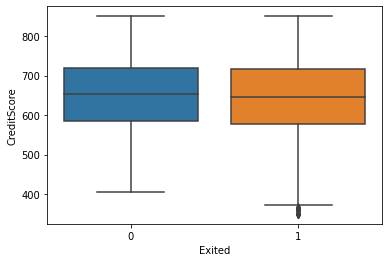

In [ ]:
sns.boxplot(x=df.Exited,y=df.CreditScore)

In [ ]:
df[df.CreditScore<=400]['Exited'].mean()

1.0

specificité et sensitivité
recall = TP/(TP+FN) = sensitivity = TPR <br/>
FPR = FP/(FP+TN) <br/>
specificity = 1 - FPR

In [ ]:
model =Sequential()
model.add(Dense(6 ,input_shape =(11,)))
model.add(Activation ('sigmoid'))
model.add(Dense(6 ))
model.add(Activation ('sigmoid'))

model.add(Dense(1))
model.add(Activation ('sigmoid'))

model.compile(loss='binary_crossentropy' , metrics =['accuracy'], optimizer='adam')

In [ ]:
hist = model.fit(x_train,y_train,batch_size = 10,epochs=100,verbose=2,validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.4899 - accuracy: 0.7958 - val_loss: 0.4774 - val_accuracy: 0.7969 - 2s/epoch - 4ms/step
Epoch 2/100
640/640 - 1s - loss: 0.4656 - accuracy: 0.7958 - val_loss: 0.4572 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 3/100
640/640 - 2s - loss: 0.4468 - accuracy: 0.7958 - val_loss: 0.4445 - val_accuracy: 0.7969 - 2s/epoch - 2ms/step
Epoch 4/100
640/640 - 2s - loss: 0.4359 - accuracy: 0.7958 - val_loss: 0.4382 - val_accuracy: 0.7969 - 2s/epoch - 3ms/step
Epoch 5/100
640/640 - 2s - loss: 0.4303 - accuracy: 0.7958 - val_loss: 0.4347 - val_accuracy: 0.7969 - 2s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.4273 - accuracy: 0.7958 - val_loss: 0.4329 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.4254 - accuracy: 0.7978 - val_loss: 0.4320 - val_accuracy: 0.7969 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.4239 - accuracy: 0.8012 - val_loss: 0.4305 - val_accuracy: 0.8081 - 1s/epoch - 2ms/step
Epoch 9/100
640/

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 activation (Activation)     (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 activation_1 (Activation)   (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
 activation_2 (Activation)   (None, 1)                 0         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable pa

In [ ]:
model1 =Sequential()
model1.add(Dense(6 ,input_shape =(11,)))
model1.add(Activation ('relu'))
model1.add(Dense(6 ))
model1.add(Activation ('relu'))

model1.add(Dense(1))
model1.add(Activation ('sigmoid'))

model1.compile(loss='binary_crossentropy' , metrics =['accuracy'], optimizer='adam')

In [ ]:
hist = model1.fit(x_train,y_train,batch_size = 10,epochs=100,verbose=2,validation_split= 0.2)

Epoch 1/100
640/640 - 2s - loss: 0.5702 - accuracy: 0.7058 - val_loss: 0.4572 - val_accuracy: 0.7969 - 2s/epoch - 4ms/step
Epoch 2/100
640/640 - 2s - loss: 0.4371 - accuracy: 0.8037 - val_loss: 0.4191 - val_accuracy: 0.8181 - 2s/epoch - 3ms/step
Epoch 3/100
640/640 - 2s - loss: 0.4061 - accuracy: 0.8284 - val_loss: 0.3992 - val_accuracy: 0.8288 - 2s/epoch - 3ms/step
Epoch 4/100
640/640 - 1s - loss: 0.3828 - accuracy: 0.8375 - val_loss: 0.3783 - val_accuracy: 0.8431 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.3644 - accuracy: 0.8475 - val_loss: 0.3657 - val_accuracy: 0.8525 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.3538 - accuracy: 0.8525 - val_loss: 0.3609 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.3487 - accuracy: 0.8564 - val_loss: 0.3607 - val_accuracy: 0.8531 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.3462 - accuracy: 0.8572 - val_loss: 0.3586 - val_accuracy: 0.8569 - 1s/epoch - 2ms/step
Epoch 9/100
640/

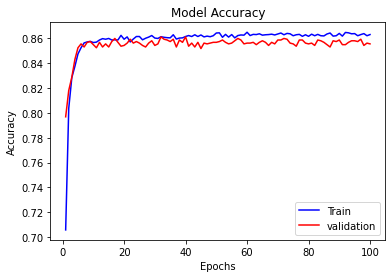

In [ ]:
val_acc=hist.history['val_accuracy']
acc=hist.history['accuracy']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

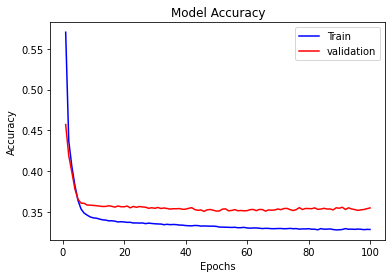

In [ ]:
val_acc=hist.history['val_loss']
acc=hist.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

In [ ]:
y_pred = model1.predict(x_test)
y_pred = (y_pred>0.5)


63/63 [==============================] - 0s 2ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_pred)
cm

array([[1489,  106],
       [ 181,  224]])

In [ ]:
opt = keras.optimizers.legacy.Adam(learning_rate=0.003,decay = 0.0001)
model1.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=opt)
hist2 = model1.fit(x_train,y_train,batch_size = 10,epochs=100,verbose=2,validation_split= 0.2)

Epoch 1/100
640/640 - 3s - loss: 0.3323 - accuracy: 0.8620 - val_loss: 0.3581 - val_accuracy: 0.8531 - 3s/epoch - 4ms/step
Epoch 2/100
640/640 - 2s - loss: 0.3312 - accuracy: 0.8623 - val_loss: 0.3577 - val_accuracy: 0.8519 - 2s/epoch - 3ms/step
Epoch 3/100
640/640 - 1s - loss: 0.3313 - accuracy: 0.8602 - val_loss: 0.3521 - val_accuracy: 0.8556 - 1s/epoch - 2ms/step
Epoch 4/100
640/640 - 1s - loss: 0.3315 - accuracy: 0.8600 - val_loss: 0.3553 - val_accuracy: 0.8500 - 1s/epoch - 2ms/step
Epoch 5/100
640/640 - 1s - loss: 0.3308 - accuracy: 0.8616 - val_loss: 0.3517 - val_accuracy: 0.8562 - 1s/epoch - 2ms/step
Epoch 6/100
640/640 - 1s - loss: 0.3302 - accuracy: 0.8631 - val_loss: 0.3513 - val_accuracy: 0.8587 - 1s/epoch - 2ms/step
Epoch 7/100
640/640 - 1s - loss: 0.3295 - accuracy: 0.8625 - val_loss: 0.3549 - val_accuracy: 0.8575 - 1s/epoch - 2ms/step
Epoch 8/100
640/640 - 1s - loss: 0.3294 - accuracy: 0.8633 - val_loss: 0.3521 - val_accuracy: 0.8544 - 1s/epoch - 2ms/step
Epoch 9/100
640/

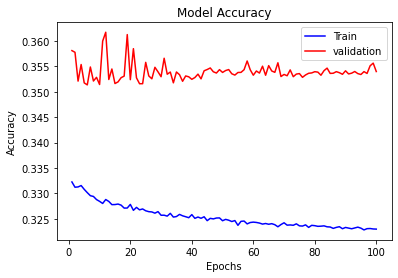

In [ ]:
val_acc=hist2.history['val_loss']
acc=hist2.history['loss']
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,'b')
plt.plot(epochs, val_acc, 'r-')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation'])

In [ ]:
def model() :
  model=Sequential()
  model.add(Dense(512, input_shape=(784,)))
  model.add(Activation('relu'))

  model.add(Dense(512))
  model.add(Activation('relu'))

  model.add(Dense(10))
  model.add(Activation('softmax'))
  opt = keras.optimizers.legacy.Adam(learning_rate=0.003,decay = 0.0001)
  model1.compile(loss="binary_crossentropy",metrics=["accuracy"],optimizer=opt)
  return model

In [ ]:
from tables.file import parameters
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
model3=KerasClassifier(build_fn=model)
parameters={'batch_size':[10,20],'epochs':[100,120]}
grid_search=GridSearchCV(estimator=model3,param_grid=parameters,scoring='accuracy',cv=10)
# grid_search=grid_search.fit(x_train,y_train)
best_parameters=grid_search.best_params_
best_accuracy=grid_search.best_score_

AttributeError: ignored